In [6]:
import numpy as np
import time
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
#import ydf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from treeple.datasets import make_trunk_classification



def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test):
    """
    Train a given model and evaluate its accuracy and training time.
    """
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    if isinstance(y_pred[0], np.ndarray):  # Some models return probabilities
        y_pred = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")
    
    return accuracy, train_time

AttributeError: module 'scipy.sparse' has no attribute 'csr_matrix'

In [2]:
n_samples = 1000
n_dim = 784
X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)


# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
def multi_model_train(model, model_name, X_train, X_test, y_train, y_test, threshold=.5):
    """
    Train a given model and evaluate its accuracy and training time.
    """
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)

    y_pred = (y_pred >= threshold).astype(int) 

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")
      
    return accuracy, train_time

In [5]:
MAX_DEPTH = 6
N_ESTIMATORS = 100
LEARNING_RATE = 0.1

# xgboost

https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

XGBoost is normally used to train gradient-boosted decision trees and other gradient boosted models. Random Forests use the same model representation and inference, as gradient-boosted decision trees, but a different training algorithm. One can use XGBoost to train a standalone random forest or use random forest as a base model for gradient boosting. Here we focus on training standalone random forest.

In [48]:

xgb_model = xgb.XGBRFRegressor(random_state=42)

accuracy, train_time = multi_model_train(xgb_model, 'xgboost', X_train, X_test, y_train, y_test)


xgboost: Accuracy = 0.7500, Training Time = 2.1322 sec


# LightGBM

In [54]:
lgbm_model = lgb.LGBMClassifier(boosting_type='rf', random_state=42, bagging_freq=1,         # Enable bagging
    bagging_fraction=0.8)
lgbm_model.set_params(max_depth=MAX_DEPTH, n_estimators=N_ESTIMATORS)
#lgbm_model.fit(X_train, y_train)
accuracy, train_time = multi_model_train(lgbm_model, 'lightGBM', X_train, X_test, y_train, y_test)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199920
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 784
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

c:\Users\clark\anaconda3\envs\treeple_new\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Catboost

In [86]:

catboost_model = cb.CatBoostClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_seed=42)

accuracy, train_time = multi_model_train(catboost_model, 'catboost', X_train, X_test, y_train, y_test)


Learning rate set to 0.077367
0:	learn: 0.6733383	total: 24.5ms	remaining: 2.43s
1:	learn: 0.6524964	total: 44.9ms	remaining: 2.2s
2:	learn: 0.6352175	total: 64.4ms	remaining: 2.08s
3:	learn: 0.6200310	total: 85.4ms	remaining: 2.05s
4:	learn: 0.6033687	total: 109ms	remaining: 2.07s
5:	learn: 0.5879104	total: 130ms	remaining: 2.04s
6:	learn: 0.5670428	total: 152ms	remaining: 2.02s
7:	learn: 0.5557316	total: 174ms	remaining: 2.01s
8:	learn: 0.5410448	total: 196ms	remaining: 1.98s
9:	learn: 0.5299693	total: 218ms	remaining: 1.96s
10:	learn: 0.5206777	total: 241ms	remaining: 1.95s
11:	learn: 0.5110500	total: 263ms	remaining: 1.93s
12:	learn: 0.5013641	total: 285ms	remaining: 1.91s
13:	learn: 0.4917662	total: 309ms	remaining: 1.9s
14:	learn: 0.4847158	total: 333ms	remaining: 1.88s
15:	learn: 0.4756782	total: 360ms	remaining: 1.89s
16:	learn: 0.4655893	total: 382ms	remaining: 1.87s
17:	learn: 0.4543263	total: 403ms	remaining: 1.83s
18:	learn: 0.4448176	total: 423ms	remaining: 1.8s
19:	learn:

# YDF

In [83]:

from sklearn.metrics import accuracy_score


def prepare_dataframe(X, y):
    df = pd.DataFrame(X)
    df.columns = [str(i) for i in df.columns]  # Convert column names to strings
    df["target"] = y.astype(int)  # Append target column

    return df


df_train = prepare_dataframe(X_train, y_train)
df_test = prepare_dataframe(X_test, y_test)

learner = ydf.RandomForestLearner(label="target", max_depth=10, num_trees=500, random_seed=42)

ydf_model = learner.train(df_train)

y_pred = ydf_model.predict(df_test)
y_pred = (y_pred >= 0.5).astype(int) 

accuracy = accuracy_score(y_test, y_pred)
print(f"YDF: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")


Train model on 800 examples
Model trained in 0:00:00.303344
YDF: Accuracy = 0.8300, Training Time = 0.4203 sec


In [ ]:
learner = ydf.RandomForestLearner(label="target", max_depth=10, num_trees=500, random_seed=42)

ydf_model = learner.train(df_train)

y_pred = ydf_model.predict(df_test)
y_pred = (y_pred >= 0.5).astype(int) 

accuracy = accuracy_score(y_test, y_pred)
print(f"YDF: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")

Train model on 800 examples
Model trained in 0:00:00.302359
YDF: Accuracy = 0.8300, Training Time = 0.4203 sec


# Trunk Simulation

In [6]:

n_samples = 1000
n_dim = 784
X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)


# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Parameters

In [4]:
# Fixed hyperparameters that used for all gpu models
MAX_DEPTH = 10
N_ESTIMATORS = 100
LEARNING_RATE = 0.1
RANDOM_SEED = 42
N_JOBS=-1

In [5]:
param_xgb = dict()
param_xgb["device"] = "cuda"    
param_xgb["tree_method"] = "hist"   # approximated splits
param_xgb["max_depth"] = MAX_DEPTH
param_xgb["n_estimators"] = N_ESTIMATORS
param_xgb["learning_rate"] = LEARNING_RATE
param_xgb["random_state"] = RANDOM_SEED
param_xgb["n_jobs"] = N_JOBS

In [9]:
param_LGBM = dict()

In [ ]:

n_dims = [10, 50, 100, 200, 400, 800, 1600, 3200, 6400, 9600, 12800, 25600, 51200]

results = []
def prepare_dataframe(X, y):
    df = pd.DataFrame(X)
    df.columns = [str(i) for i in df.columns]  # Convert column names to strings
    df["target"] = y.astype(int)  # Append target column

    return df

for n_dim in n_dims:
    print(f"\n--- Running Experiment with {n_dim} Dimensions ---")

    # Generate Data
    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- Train XGBoost ---
    xgb_model = xgb.XGBRFRegressor(**param_xgb)
    acc_xgb, time_xgb = multi_model_train(xgb_model, "XGBoost", X_train, X_test, y_train, y_test)

    # --- Train LightGBM ---
    lgbm_model = lgb.LGBMClassifier(boosting_type='rf', 
                                    random_state=RANDOM_SEED, 
                                    bagging_freq=1, 
                                    bagging_fraction=0.8, 
                                    learning_rate=LEARNING_RATE,
                                    max_depth=MAX_DEPTH,
                                    n_estimators=N_ESTIMATORS,
                                    device="gpu",
                                    n_jobs=N_JOBS)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM", X_train, X_test, y_train, y_test)

    # --- Train CatBoost ---
    catboost_model = cb.CatBoostClassifier(n_estimators=N_ESTIMATORS,
                                           max_depth=MAX_DEPTH, 
                                           random_seed=RANDOM_SEED, 
                                           learning_rate=LEARNING_RATE,
                                           verbose=0,
                                           task_type="GPU",
                                           devices='0')
    acc_cb, time_cb = multi_model_train(catboost_model, "CatBoost", X_train, X_test, y_train, y_test)

    # # --- Train YDF ---
    
    # df_train = prepare_dataframe(X_train, y_train)
    # df_test = prepare_dataframe(X_test, y_test)

    # learner = ydf.RandomForestLearner(label="target", 
    #                                   max_depth=MAX_DEPTH, 
    #                                   num_trees=N_ESTIMATORS, 
    #                                   random_seed=RANDOM_SEED)
    # start_time = time.time()
    # ydf_model = learner.train(df_train)
    # time_ydf = time.time() - start_time
    # y_pred = ydf_model.predict(df_test)
    # y_pred = (y_pred >= 0.5).astype(int) 

    # acc_ydf = accuracy_score(y_test, y_pred)

    # print(f"YDF | Dim: {n_dim} | Accuracy: {acc_ydf:.4f} | Train Time: {time_ydf:.4f} sec")

    # Store results
    results.append(["XGBoost", n_dim, acc_xgb, time_xgb])
    results.append(["LightGBM", n_dim, acc_lgb, time_lgb])
    results.append(["CatBoost", n_dim, acc_cb, time_cb])
    #results.append(["YDF", n_dim, acc_ydf, time_ydf])

# Convert results to a DataFrame and save
df_results = pd.DataFrame(results, columns=["Model", "n_dim", "Accuracy", "Training_Time"])
df_results.to_csv("./result/trunk_simulation_results.csv", index=False, mode="w")

print("\nResults saved to ./result/trunk_simulation_results.csv")


--- Running Experiment with 10 Dimensions ---


c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 10. Setting n_informative to n_dim.
  warnings.warn(
c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:37:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy = 0.7800, Training Time = 6.0210 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CatBoost: Accuracy = 0.7750, Training Time = 3.7067 sec
Train model on 800 examples
Model trained in 0:00:00.016160
YDF | Dim: 10 | Accuracy: 0.7800 | Train Time: 0.0319 sec

--- Running Experiment with 50 Dimensions ---


c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 50. Setting n_informative to n_dim.
  warnings.warn(


XGBoost: Accuracy = 0.8050, Training Time = 1.3784 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 50
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Inf

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7550, Training Time = 0.4281 sec
CatBoost: Accuracy = 0.8100, Training Time = 1.6405 sec
Train model on 800 examples
Model trained in 0:00:00.019311
YDF | Dim: 50 | Accuracy: 0.8100 | Train Time: 0.0272 sec

--- Running Experiment with 100 Dimensions ---


c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


XGBoost: Accuracy = 0.7300, Training Time = 1.3447 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 100
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [In

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CatBoost: Accuracy = 0.7400, Training Time = 1.8570 sec
Train model on 800 examples
Model trained in 0:00:00.026208
YDF | Dim: 100 | Accuracy: 0.8050 | Train Time: 0.0326 sec

--- Running Experiment with 200 Dimensions ---


c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


XGBoost: Accuracy = 0.7550, Training Time = 1.4310 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 200
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [In

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CatBoost: Accuracy = 0.7600, Training Time = 2.3430 sec
Train model on 800 examples
Model trained in 0:00:00.042218
YDF | Dim: 200 | Accuracy: 0.7950 | Train Time: 0.0544 sec

--- Running Experiment with 400 Dimensions ---


c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 400. Setting n_informative to n_dim.
  warnings.warn(


XGBoost: Accuracy = 0.7750, Training Time = 1.6098 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 400
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [I

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7700, Training Time = 0.6629 sec
CatBoost: Accuracy = 0.7750, Training Time = 3.7170 sec
Train model on 800 examples
Model trained in 0:00:00.051999
YDF | Dim: 400 | Accuracy: 0.7800 | Train Time: 0.0640 sec

--- Running Experiment with 800 Dimensions ---
XGBoost: Accuracy = 0.7450, Training Time = 2.4302 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: baggin

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CatBoost: Accuracy = 0.7750, Training Time = 5.2501 sec
Train model on 800 examples
Model trained in 0:00:00.079589
YDF | Dim: 800 | Accuracy: 0.7550 | Train Time: 0.1039 sec

--- Running Experiment with 1600 Dimensions ---
XGBoost: Accuracy = 0.7400, Training Time = 2.7616 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 408000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1600
[LightGBM] [Info] Using GPU Dev

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CatBoost: Accuracy = 0.7900, Training Time = 9.3768 sec
Train model on 800 examples
Model trained in 0:00:00.118512
YDF | Dim: 1600 | Accuracy: 0.7450 | Train Time: 0.2090 sec

--- Running Experiment with 3200 Dimensions ---
XGBoost: Accuracy = 0.7450, Training Time = 4.1747 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 816000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 3200
[LightGBM] [Info] Using GPU De

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7400, Training Time = 3.8522 sec
CatBoost: Accuracy = 0.7600, Training Time = 16.7502 sec
Train model on 800 examples
Model trained in 0:00:00.201021
YDF | Dim: 3200 | Accuracy: 0.7050 | Train Time: 0.3445 sec

--- Running Experiment with 6400 Dimensions ---
XGBoost: Accuracy = 0.7250, Training Time = 7.7340 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bag

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CatBoost: Accuracy = 0.7600, Training Time = 31.9912 sec
Train model on 800 examples
Model trained in 0:00:00.315725
YDF | Dim: 6400 | Accuracy: 0.6900 | Train Time: 0.5666 sec

--- Running Experiment with 9600 Dimensions ---
XGBoost: Accuracy = 0.7100, Training Time = 10.2361 sec
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2448000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9600
[LightGBM] [Info] Using GPU

c:\Users\clark\anaconda3\envs\treeple_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


: 

In [91]:
import pandas as pd
import numpy as np
import os

dummy_data = pd.DataFrame({
    "Model": ["XGBoost", "LightGBM", "CatBoost", "YDF"] * 6,
    "n_dim": [100, 200, 400, 800, 1600, 3200] * 4,
    "Accuracy": np.random.uniform(0.6, 0.9, 24),
    "Training_Time": np.random.uniform(10, 50, 24),
})

os.makedirs("./result", exist_ok=True)
dummy_data.to_csv("./result/trunk_simulation_results.csv", index=False)
print("Dummy data saved.")


Dummy data saved.


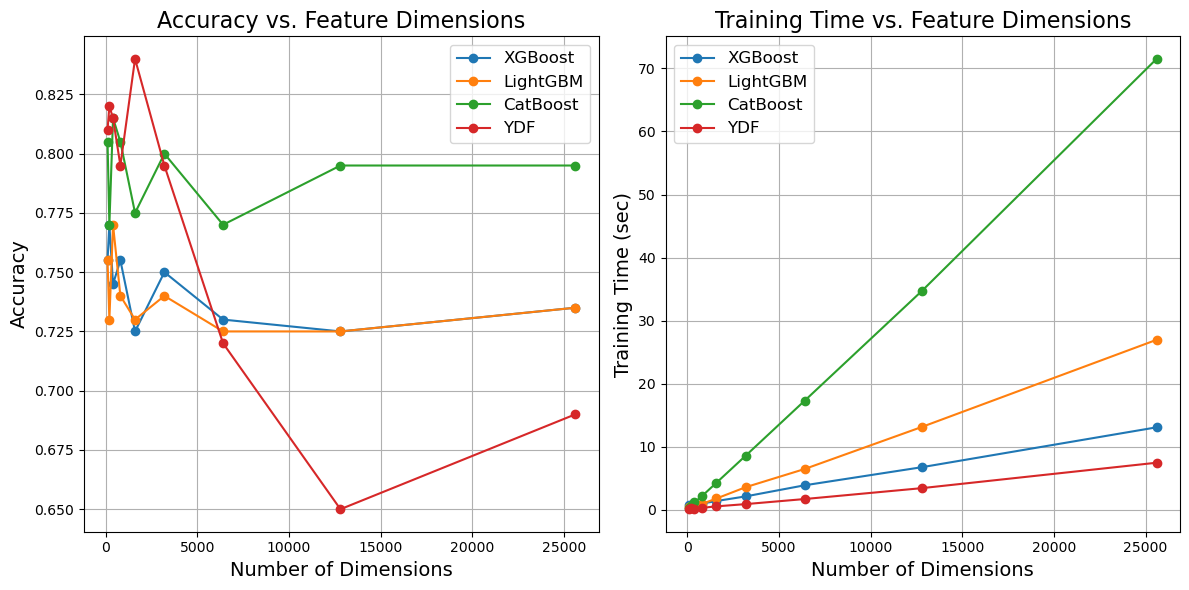

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
results_filepath = "./result/trunk_simulation_results.csv"

# Load the results file
df_results = pd.read_csv(results_filepath)

# Extract unique models and feature dimensions
models = df_results["Model"].unique()
n_dims = df_results["n_dim"].unique()

# Create figure for visualization
plt.figure(figsize=(12, 6))

# Plot Accuracy vs. Feature Dimensions
plt.subplot(1, 2, 1)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Accuracy"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Plot Training Time vs. Feature Dimensions
plt.subplot(1, 2, 2)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Training_Time"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Training Time (sec)", fontsize=14)
plt.title("Training Time vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


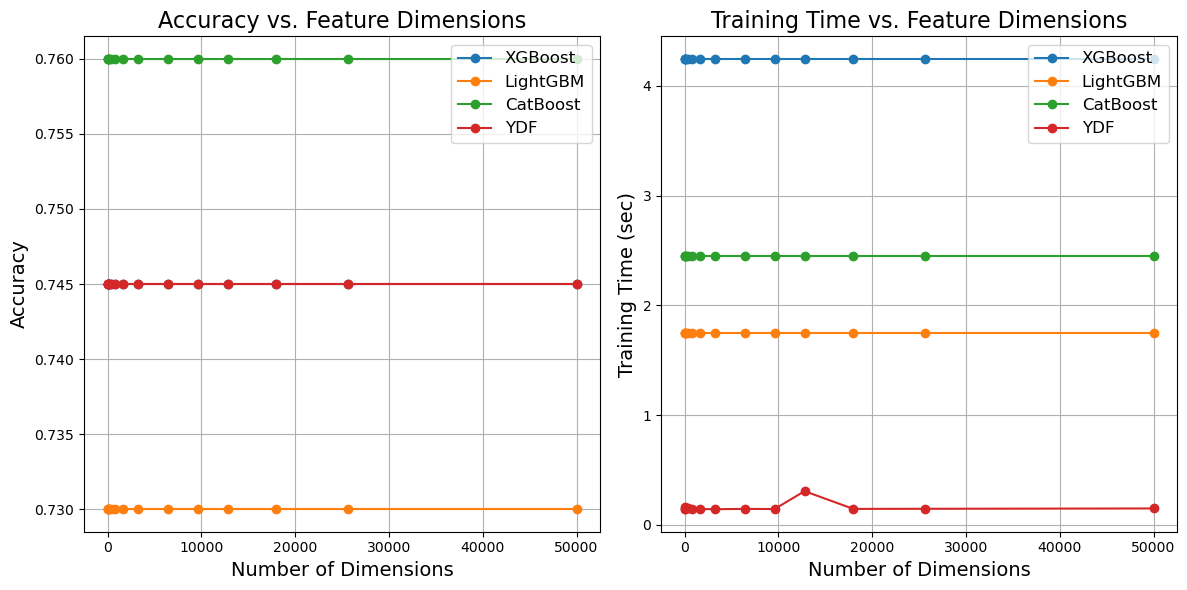

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
results_filepath = "./result/trunk_simulation_results.csv"

# Load the results file
df_results = pd.read_csv(results_filepath)

# Extract unique models and feature dimensions
models = df_results["Model"].unique()
n_dims = df_results["n_dim"].unique()

# Create figure for visualization
plt.figure(figsize=(12, 6))

# Plot Accuracy vs. Feature Dimensions
plt.subplot(1, 2, 1)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Accuracy"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Plot Training Time vs. Feature Dimensions
plt.subplot(1, 2, 2)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Training_Time"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Training Time (sec)", fontsize=14)
plt.title("Training Time vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()
